In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn import datasets, linear_model
from matplotlib import pyplot
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('downloads/houses_to_rent_v3.csv')
df = data

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


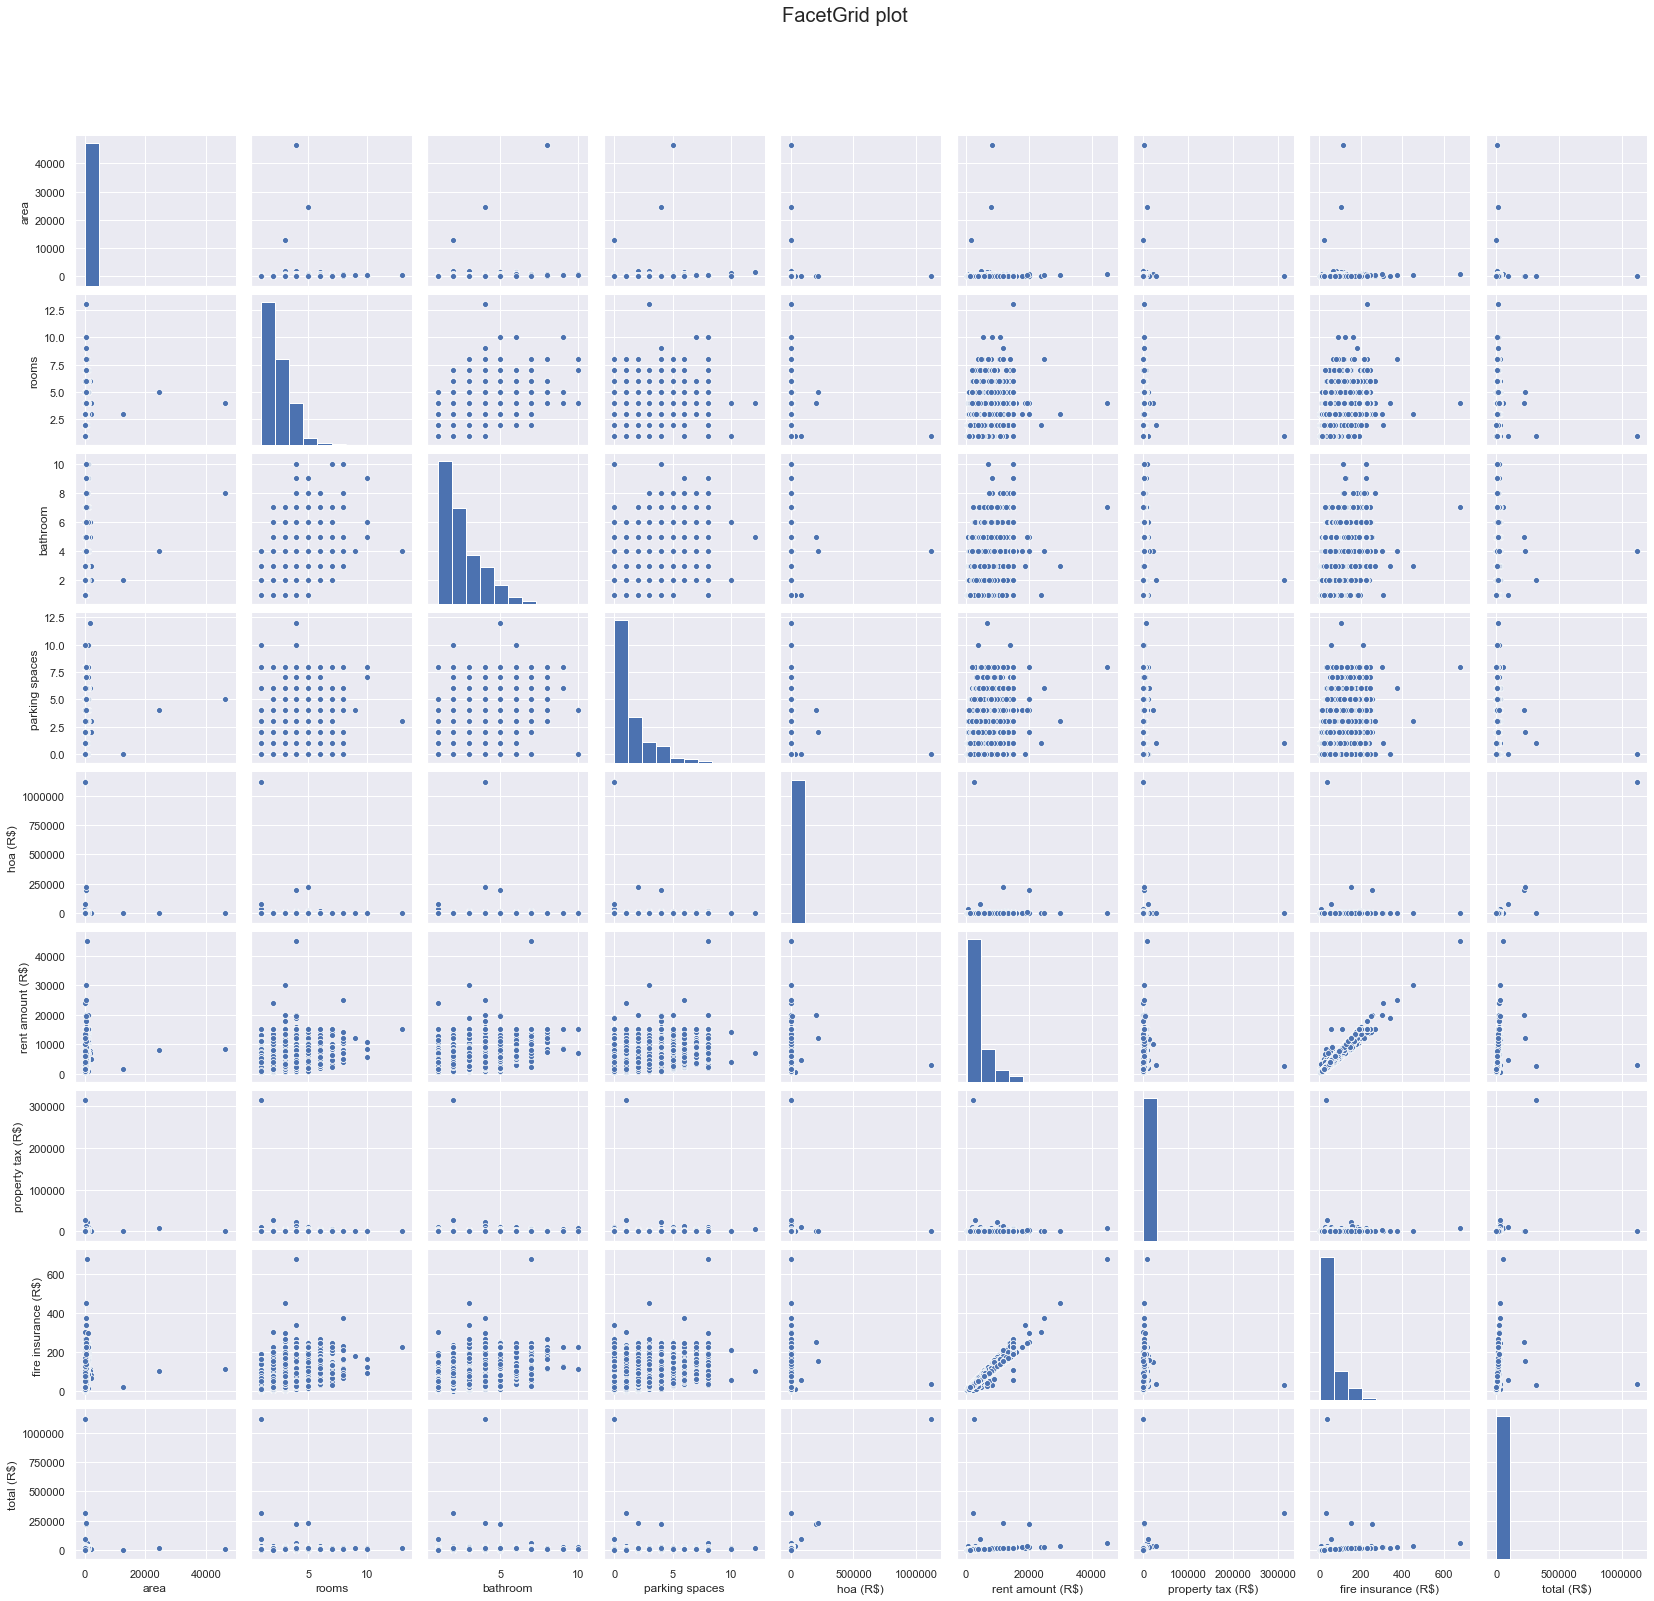

In [3]:
#pre_visualize()
g = sns.pairplot(df)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9)

In [9]:
y = df['total (R$)']
feature = df['area']
#, 'city', 'rooms', 'bathroom', 'floor'
#maybe cities need to be in ones and zeros
x = (feature)

#test_train_split_N_reshape()

y = y.values.reshape(-1,1)

x = x.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=1)

train_test_split(y, shuffle=False)


[array([[5618],
        [7973],
        [3841],
        ...,
        [ 659],
        [2143],
        [6338]], dtype=int64),
 array([[ 5476],
        [ 3561],
        [ 5905],
        ...,
        [ 7390],
        [14020],
        [ 1587]], dtype=int64)]

In [10]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 8, stop = 8, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [11]:
#rf_hp()
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [12]:
#rfr_model_W_GSCV()
forest_model = RandomForestRegressor()
forest_grid = GridSearchCV(estimator = forest_model, param_grid = param_grid, cv = 6, verbose = 2, n_jobs = 2)
forest_grid.fit(x_train, y_train.ravel())

Fitting 6 folds for each of 352 candidates, totalling 2112 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 552 tasks      | elapsed:   19.7s
[Parallel(n_jobs=2)]: Done 1364 tasks      | elapsed:   47.3s
[Parallel(n_jobs=2)]: Done 2112 out of 2112 | elapsed:  1.2min finished


GridSearchCV(cv=6, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [10],
                         'n_estimators': [8, 8, 8, 8, 8, 8, 8, 8]},
             verbose=2)

In [13]:
forest_grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 8}

In [14]:
#rfr_accuracy()
print(f'Train Accuracy - : {forest_grid.score(x_train, y_train):.3f}')
print(f'Test Accuracy - : {forest_grid.score(x_test, y_test):.3f}')

Train Accuracy - : 0.117
Test Accuracy - : 0.106


In [15]:
#rfr_importance()
forest_model.feature_importances_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    #from sklearn.ensemble import RandomForestRegressor

IndentationError: unexpected indent (<ipython-input-15-31bc48098070>, line 3)

Text(0.5, 1.0, 'Residual plot')

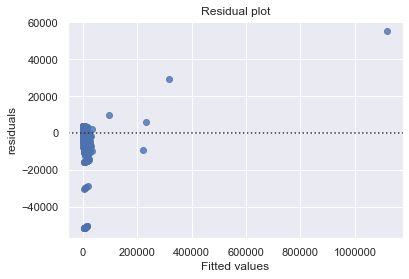

In [38]:
predictions = forest_grid.predict(x_train)
y_trainresiduals = y_train.reshape(-1)
residuals = y_trainresiduals - predictions
residuals
y_trainresiduals
sns.residplot(y_trainresiduals, residuals)
        

plt.ylabel('residuals')
plt.xlabel("Fitted values")
plt.title('Residual plot')


In [61]:
import sklearn.metrics.roc_auc_score

ModuleNotFoundError: No module named 'sklearn.metrics.roc_auc_score'